In [1]:
import os

from rdflib import Graph, URIRef, Literal, Namespace, RDF, RDFS, ConjunctiveGraph
from rdflib.plugins.stores.memory import Memory
from icecream import ic
import networkx as nx
import matplotlib
import scipy

csmodl_patterns_folder = "../csmodl/patterns/"
enslaved_patterns_folder = "./enslaved-modl/patterns/"

{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'subClassOf'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'subClassOf'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs', 'prop': 'range'}
{'ns': 'rdfs', 'prop': 'domain'}
{'ns': 'rdfs'

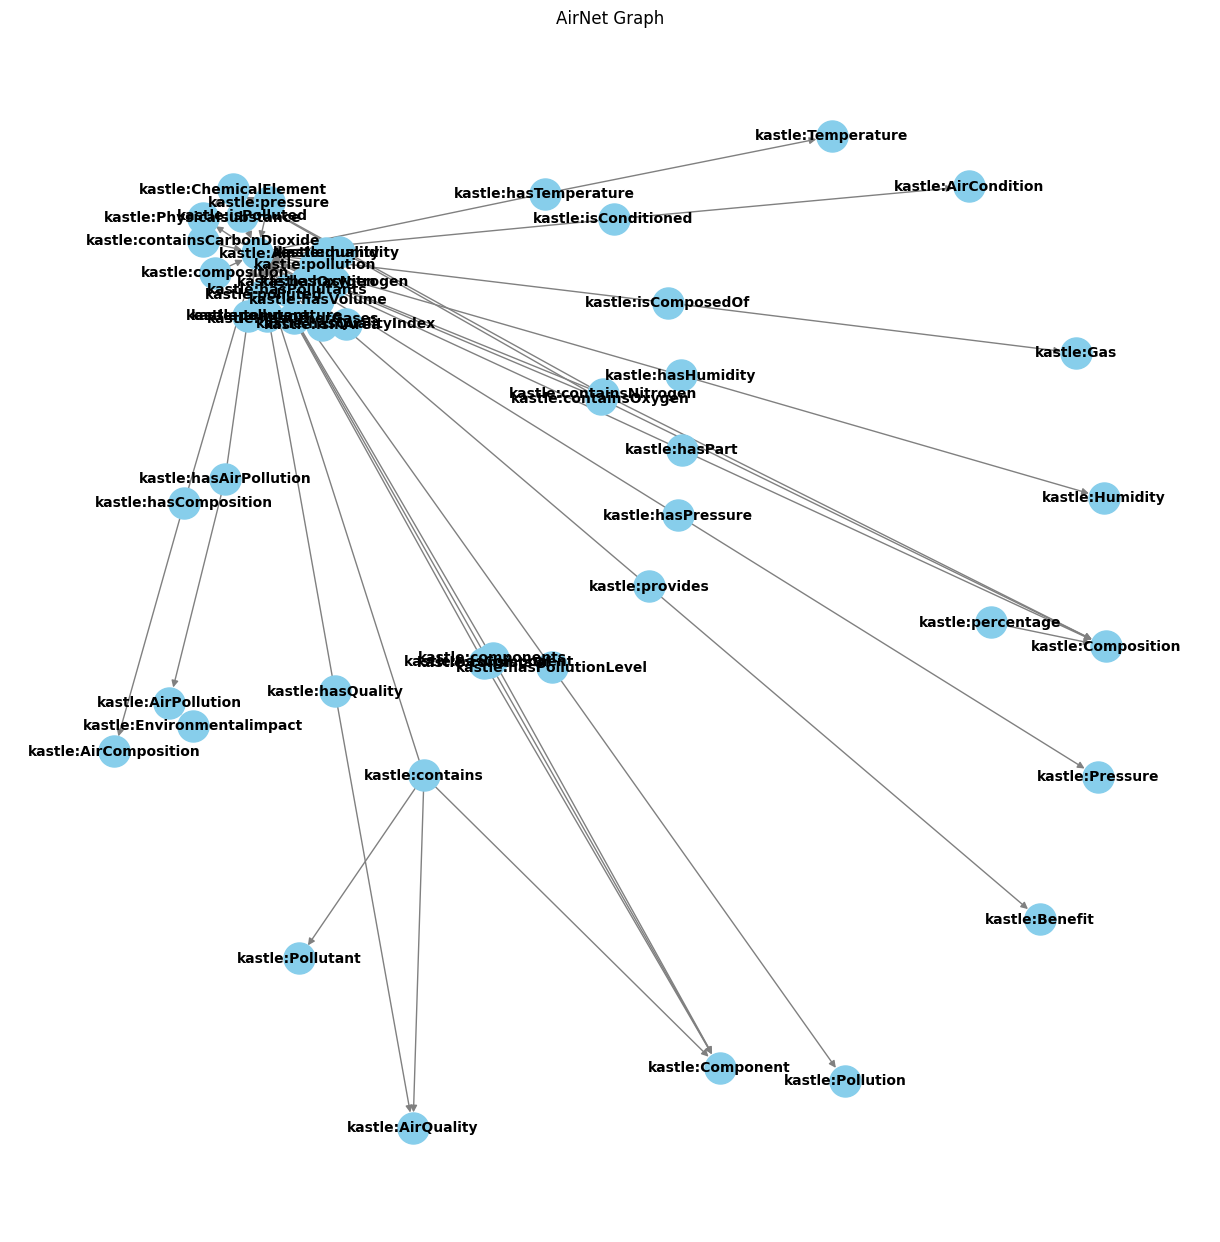

In [2]:
# For testing, confirming functionality with single file: Air.ttl

air = Graph()
airNet = nx.DiGraph()
airNS = []

with open(f"{csmodl_patterns_folder}air.ttl", 'r') as f:
    data = f.read()
    air.parse(data=data, format='turtle')

for ns in air.namespaces():
    air.bind(ns[0], ns[1])
#    print(ns)
    airNS.append(ns)
    #print(ns)

for s, p, o in air:
    for ns in airNS:
        if ns[1] in s:
            s = str(s).replace(ns[1], ns[0]+":")
        if ns[1] in o:
            o = str(o).replace(ns[1], ns[0]+":")
        if ns[1] in p:
            p = str(p).replace(ns[1], ns[0]+":")
    if s.startswith("kastle") and o.startswith("kastle"):
        airNet.add_node(s)
        airNet.add_node(o)
        airNet.add_edge(s, o, ns=p.split(":")[0],prop=p.split(":")[1],)
    #print(f"{s} -> {p} -> {o}")
    #airNet.add_edge(s, p)
    #print(f"{s} -> {p}")
    #airNet.add_edge(p, o)
    #print(f"{p} -> {o}")

#print(airNet.edges(data=True))

for edge in airNet.edges(data=True):
    print(edge[2])

print(airNet.number_of_nodes())
print(airNet.number_of_edges())
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(airNet)
nx.draw(airNet, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("AirNet Graph")
plt.show()

In [3]:
# All CS-MoDL patterns
store=Memory()

g = ConjunctiveGraph(store=store)
gNet = nx.DiGraph()
gNS = []



for filename in os.listdir(csmodl_patterns_folder):
    file_path = os.path.join(csmodl_patterns_folder, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as f:
            data = f.read()
            fGraph = Graph(store=store, identifier=filename)
            fGraph.parse(data=data, format='turtle')

#print("Contexts:")
#for c in g.contexts():
#    print(f"-- {c.identifier}")

#for ns in g.namespaces():
    #print(ns)

for ns in g.namespaces():
    g.bind(ns[0], ns[1])
#    print(ns)
    gNS.append(ns)
    #print(ns)

for s, p, o in g:
    for ns in gNS:
        if ns[1] in s:
            s = str(s).replace(ns[1], ns[0]+":")
        if ns[1] in o:
            o = str(o).replace(ns[1], ns[0]+":")
        if ns[1] in p:
            p = str(p).replace(ns[1], ns[0]+":")
    gNet.add_edge(s, o, ns=p.split(":")[0],prop=p.split(":")[1])
    #print(f"{s} -> {p} -> {o}")
    #gNet.add_edge(s, p)
    #print(f"{s} -> {p}")
    #gNet.add_edge(p, o)
    #print(f"{p} -> {o}")


print(gNet.number_of_nodes())
print(gNet.number_of_edges())

3182
10480
